## Homework 4 

Nolan Yager

Due: 2024-11-13 at 8:30 AM


In [36]:
# Preparation

# Import Packages: 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 

# Current WD:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\nyager\Desktop\YagerMLCode\MachineLearning_Fall24\homework


# Homework - Regression Trees

The goal of this analysis is to use a regression tree to predict the number of per-capita COVID-19 deaths in each county in the US using the SVI variables.

1. Load the data file.

In [ ]:
# Loading data
covid_data = pd.read_csv("data/processed/svi_covid.csv")

print(covid_data.head(5))

   Unnamed: 0  fips_code  total_cases_per_100k  total_deaths_per_100k  \
0           1       1001          33888.123075             399.925120   
1           2       1003          30212.064090             313.169394   
2           3       1005          30477.951521             418.056840   
3           4       1007          36623.073120             498.853984   
4           5       1009          31944.750072             441.796300   

   E_TOTPOP  EP_POV150  EP_UNEMP  EP_HBURD  EP_NOHSDP  EP_UNINSUR  ...  \
0     58761       20.2       2.8      19.7        9.6         7.4  ...   
1    233420       18.3       3.4      23.2        8.4         9.3  ...   
2     24877       37.7       5.8      25.1       23.5        10.7  ...   
3     22251       29.0       8.7      23.2       21.1         8.4  ...   
4     59077       22.9       6.0      19.4       18.2        10.2  ...   

   EP_DISABL  EP_SNGPNT  EP_LIMENG  EP_MINRTY  EP_MUNIT  EP_MOBILE  EP_CROWD  \
0       16.4        5.6        0.4  

2. Write the following functions:
    - A function that fits a regression tree to data. The function should take as input the data, the outcome variable, the predictor variables, and the maximum depth of the tree. The function should return the fitted tree.
    _Note: Many packages have functions that penalize the complexity of the tree to avoide overfitting. You should make sure that the function you write does not use any penalization for the complexity of the tree._
    - A function that predicts the outcome variable using a fitted tree. The function should take as input the fitted tree and the data for which to make predictions. The function should return the predicted values.
    - A function that calculates the mean squared error of the predictions. The function should take as input the predicted values and the true values. The function should return the mean squared error.

In [38]:
# Function that fits a regression tree: 

from sklearn.tree import DecisionTreeRegressor

def fit_regression_tree(data, outcome_var, predictor_vars, max_depth=None):
    # Extract predictors and outcome
    X = data[predictor_vars]
    y = data[outcome_var]
    
    # Creating and fittig reg tree
    reg_tree = DecisionTreeRegressor(max_depth=max_depth)
    reg_tree.fit(X, y)
    
    return reg_tree

# Fitting tree with outcome as Covid deaths per 100k people and all other variables as predictors
outcome_var = 'total_deaths_per_100k'
predictor_vars = [
    'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR',
    'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG',
    'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH',
    'EP_GROUPQ', 'EP_NOINT'
]

# Assuming covid_data is your loaded DataFrame
fit_tree = fit_regression_tree(covid_data, outcome_var, predictor_vars, max_depth=5)

print(fit_tree)


DecisionTreeRegressor(max_depth=5)


In [39]:
# Now using 
def predict_with_tree(fit_tree, data, predictor_vars):
    # Extracting predictors from the data
    X = data[predictor_vars]
    
    # Make predictions
    predictions = fit_tree.predict(X)
    
    return predictions

# Using Covid Deaths as outcome and predictor variables. 
predictions = predict_with_tree(fit_tree, covid_data, predictor_vars)
print(predictions)

[376.14809343 333.5492792  607.41897909 ... 328.53970147 407.39952317
 407.39952317]


In [40]:
from sklearn.metrics import mean_squared_error

def calculate_mse(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    return mse

# For outcome total covid deaths per 100k people
true_values = covid_data['total_deaths_per_100k'] 
mse = calculate_mse(predictions, true_values)
print("Mean Squared Error:", mse)

Mean Squared Error: 19196.020453161585


3. Use 5-fold cross-validation to calculate the mean squared error of the regression tree for maximum tree depths 1, ..., 10.
The outcome variable is `total_deaths_per_100k` and the predictor variables are `EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define a function to perform cross-validation for different tree depths
# Defining function to perform cross-validation on different tree depths
def cross_validate_tree(data, outcome_var, predictor_vars, max_depths):
    # getting predictor variables and outcomes
    X = data[predictor_vars]
    y = data[outcome_var]
    # mse scorer
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    results = {}
    for depth in max_depths:
        model = DecisionTreeRegressor(max_depth=depth)
        # Perform 5-fold cross-validation
        mse_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
        # Store the mean MSE (positive value)
        results[depth] = -np.mean(mse_scores)
    
    return results

# Maximum depths to evaluate
max_depths = list(range(1, 11))

# Doing cross validation: 
mse_results = cross_validate_tree(covid_data, outcome_var, predictor_vars, max_depths)

# Displaying results
for depth, mse in mse_results.items():
    print(f"Max Depth {depth}: Mean Squared Error = {mse:.4f}")

Max Depth 1: Mean Squared Error = 26949.9864
Max Depth 2: Mean Squared Error = 24660.5885
Max Depth 3: Mean Squared Error = 24149.0071
Max Depth 4: Mean Squared Error = 24487.2648
Max Depth 5: Mean Squared Error = 25797.8514
Max Depth 6: Mean Squared Error = 27094.2461
Max Depth 7: Mean Squared Error = 29886.7138
Max Depth 8: Mean Squared Error = 30936.3302
Max Depth 9: Mean Squared Error = 30774.6521
Max Depth 10: Mean Squared Error = 32042.3109


4. Plot the mean squared error as a function of the maximum tree depth.

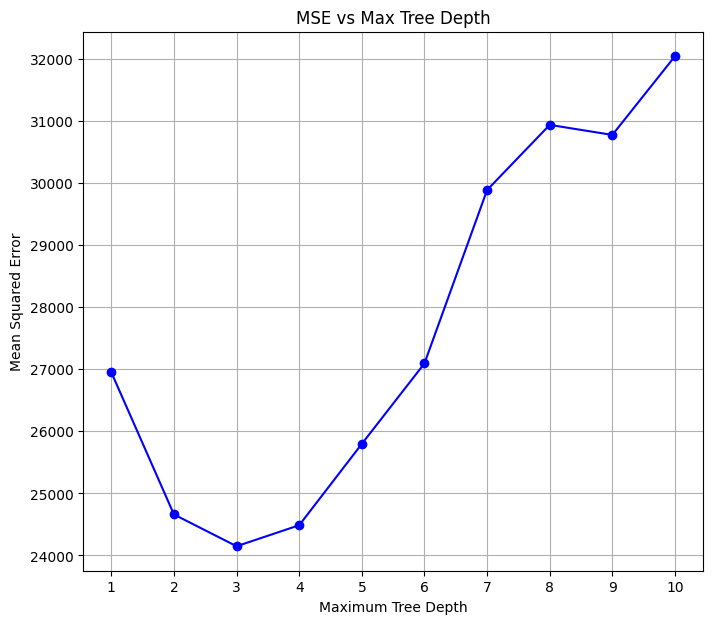

In [42]:
import matplotlib.pyplot as plt

# Using mse_results
depths = list(mse_results.keys())
mse_values = list(mse_results.values())

# Plotting mse as a function of max tree depth
plt.figure(figsize=(8, 7))
plt.plot(depths, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Max Tree Depth')
plt.xticks(depths)
plt.grid(True)
plt.show()


5. Which maximum tree depth would you choose based on the cross-validation results? Why?

I would choose a max tree depth of 3, as that's when the MSE is the lowest on the plotted curve. This will hopefully prevent overfitting due to model complexity

6. Fit a regression tree to the full data using the maximum tree depth you chose in the previous question.

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Fitting regression tree to covid data with max depth of 3
def fit_full_tree(data, outcome_var, predictor_vars, max_depth=3):
    # Extract predictors and outcome
    X = data[predictor_vars]
    y = data[outcome_var]
    
    # Create and fit the regression tree
    reg_tree = DecisionTreeRegressor(max_depth=max_depth)
    reg_tree.fit(X, y)
    
    return reg_tree

# Fitting full tree using previously specified variables and such
fitted_tree_full = fit_full_tree(covid_data, outcome_var, predictor_vars, max_depth=3)

print(fitted_tree_full)

DecisionTreeRegressor(max_depth=3)


7. Plot the fitted tree. Summarize the tree in words. What variables seem to be the most important predictors of the number of per-capita COVID-19 deaths?

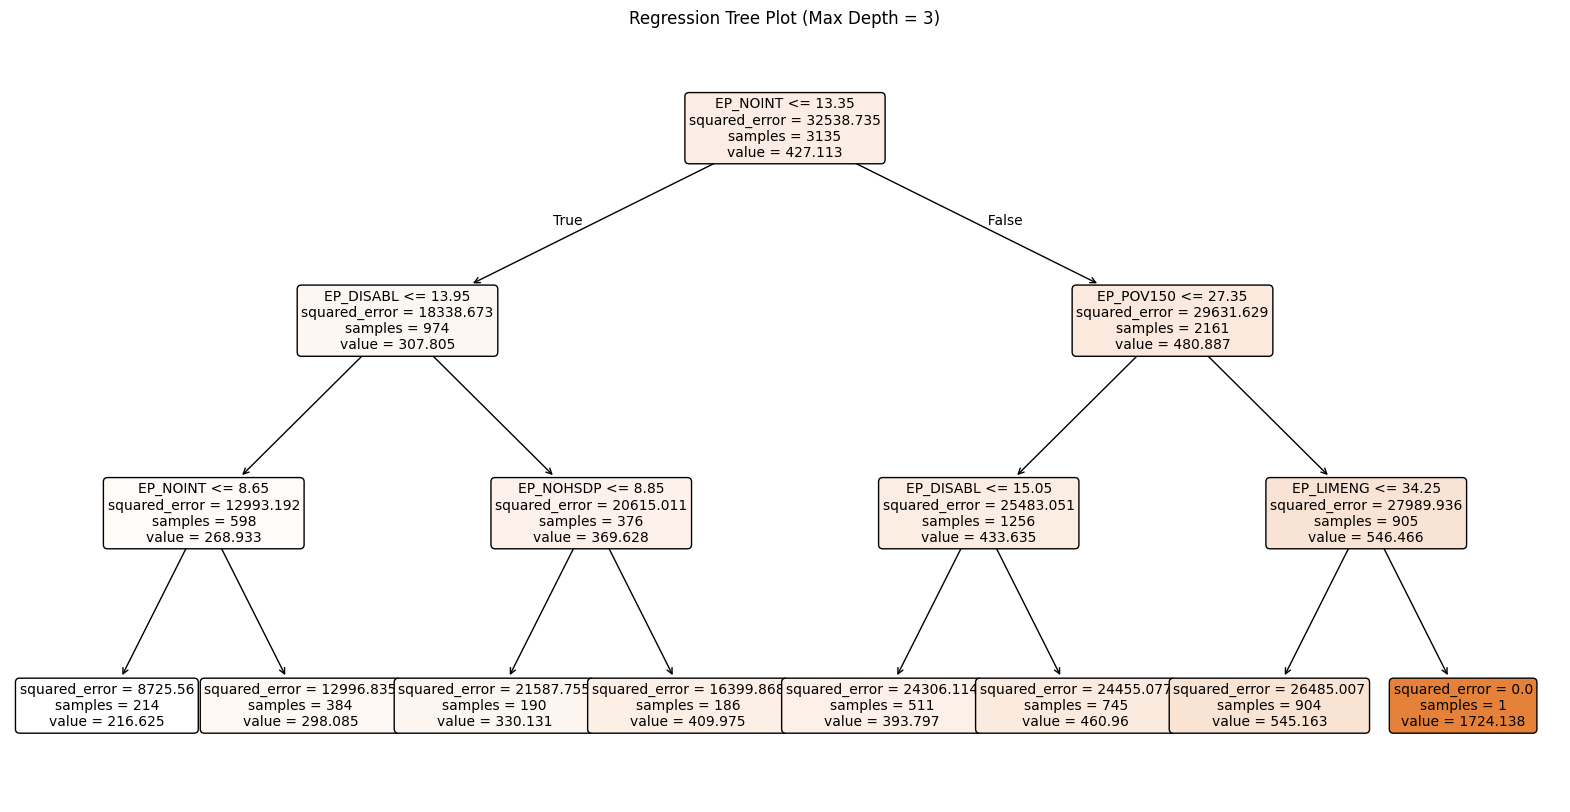

In [44]:
from sklearn.tree import plot_tree

# Fitted regression tree
def plot_fitted_tree(fitted_tree, feature_names):
    plt.figure(figsize=(20, 10))
    plot_tree(fitted_tree, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
    plt.title("Regression Tree Plot (Max Depth = 3)")
    plt.show()

# Plotting it
plot_fitted_tree(fitted_tree_full, predictor_vars)

Written answer for #7

First: 
First split occurs at "no internet." So we can see that whether or not a household has internet has a significant influence on the predicted value for COVID-19 deaths. 

Second:
Then we see the next two nodes, "disabled" (if no internet = true) and "150% of poverty level" (if no internet = false). For disabled persons, this would possibly suggest that disabled individuals (i.e. some of these individuals with pre-existing health conditions) may be more susceptible to severe COVID infection and death. 150% of poverty level node suggests that individuals of different wealth levels may be differentially susceptible to COVID, i.e., wealth may be a good indicator (or perhaps a good proxy measure) for access to care in this dataset. 

Third:
Then, under Disabled, we see a split again at no internet (hm interesting), as well as some other splits at no high school diploma (NOHSDP). Under the 150% poverty level node, we see disabled again as well as limited english households as two further nodes. 

8. Plot the predicted values against the true values. How much would you trust the predictions of the regression tree? Why?

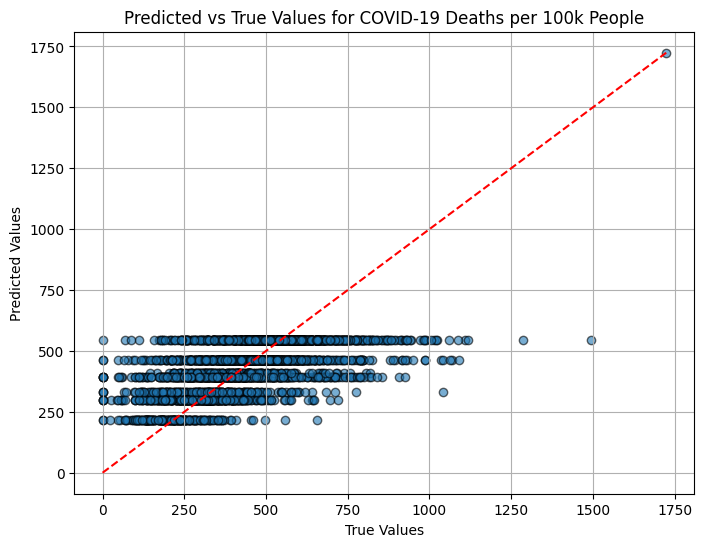

In [45]:
# Predicted vs true values
def plot_predictions(fitted_tree, data, predictor_vars, true_values, outcome_var):
    # Making predictions
    X = data[predictor_vars]
    predictions = fitted_tree.predict(X)
    
    # True vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predictions, alpha=0.6, edgecolors='k')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs True Values for COVID-19 Deaths per 100k People')
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='r', linestyle='--')
    plt.grid(True)
    plt.show()

# Assuming the true values are the total covid deaths per 100k column
plot_predictions(fitted_tree_full, covid_data, predictor_vars, covid_data['total_deaths_per_100k'], outcome_var)

Written answer for #8

So we are seeing some problems here. A lot of the points are pretty far off the red-dashed line, so that's not great. 

It might be the case that having a depth of 3 is too shallow to capture the complexity of the data, so perhaps we're not adequately capturing the complexity. 

Also, we're seeing a few values that are major outliers which the model has struggled to predict accurately. 

So here, we're witnessing a classic ML trade off: while this tree with a max depth of 3 is relatively simple and easy to understand, this perhaps came at the cost of the predictive power of the model for COVID-19 deaths. 